In [ ]:
###############################################################################
###############################################################################
###     Force and Torque Estimations for Pressure Washer & Gantry           ###
###                     Author: Blake Hament                                ###
###                   UNLV,DASL,INSPIRE - May 2021                          ###
###############################################################################
###############################################################################

In [ ]:
import numpy as np

In [ ]:
###############################################################################
### Flow Characteristics
###############################################################################
density_water = 997 ### (kg/m^3)
gpm = 4 ### (gal/min)
P = 4000 ### (PSI)
Pambient = 14.7 ### (PSI)
Qmass = gpm*(1/60)*(3.785/1) ### gal/min * (min/s) * (kg/gal) = kg/s
d = .001 ### (m)
QVol = gpm * (1/60) * (1/264.172) ### (gal/min) * (min/s) * (m^3/gal) = (m^3/s) ### should be in ballpark of .0002
A = np.pi*((d/2)**2) ### (m^2) could be as low as 10^-6 (even slightly lower)
v_flow = QVol / A ### (m/s) should be in ballpark of 100 m/s
v_P = np.sqrt(P/(.5*density_water)) ### (m/s)
v = max(v_flow,v_P) ### (m/s)
### Bernoulli's
v_Pam = np.sqrt(2*(P-Pambient)/density_water+v**2) ### (m/s)
F_jet_thrust = Qmass*v ### (N)
F_p_drop = A*(P-Pambient) ### (N)
F_v_drop = Qmass*(v_Pam-v) ### (N)
### Check Vals
print("P:",P,"(PSI)")
print("Pambient:",Pambient,"(PSI)")
print("Qmass:",Qmass,"(kg/s)")
print("QVol:",QVol,"(m^3/s)")
print("A:",A,"(m^2)")
print("v_flow:",v_flow,"(m/s)")
print("v_P:",v_P,"(m/s)")
print("v:",v,"(m/s)")
print("v_Pam:",v_Pam,"(m/s)")
print("F_jet_thrust:",F_jet_thrust,"(N)")
print("F_v_drop:",F_v_drop,"(N)")
print("F_p_drop:",F_p_drop,"(N)")

### Reaction Force from Water Jet
### paper found 20-35% more reaction force than expected from following equation https://www.wjta.org/images/wjta/Proceedings/Papers/2013/C1%20-%20DW%20Impact.pdf
F_wj = .052*np.sqrt(P)*gpm ### should basically be Qmass*v...
F_wj_adj = 1.3*F_wj
print("F_wj:",F_wj,"(N)")
print("F_wj_adj:",F_wj_adj,"(N)")

### Pipe Bend
theta = np.pi/2 ### (rad)
#v2 = .99*v ### Pressure after bend, assuming 1% loss
v2 = v ### (m/s)
P2 = P + density_water*.5*(v**2-v2**2) ### (PSI)
Fbendz = -(-P*A -P2*A*np.cos(theta)-density_water*QVol*(v+v2*np.cos(theta))) ### (N)
Fbendx = P2*A*np.sin(theta) + density_water*v2*QVol*np.sin(theta) ### (N)
Fbend = np.sqrt(Fbendx**2+Fbendz**2) ### (N)
print("v2:",v2,"(m/s)")
print("P2:",P2,"(PSI)")
print("Fx:",Fbendx,"(N)")
print("Fz:",Fbendz,"(N)")
print("Fbend:",Fbend,"(N)")

###############################################################################
### Force Totals
###############################################################################
Fx_total = F_jet_thrust + F_p_drop + F_v_drop + F_wj_adj + Fbendx ### (N)
Fz_total = Fbendz ### (N)
print("Fx_total:",Fx_total,"(N)")
print("Fz_total:",Fz_total,"(N)")

###############################################################################
### Torque Totals
###############################################################################
rx_nozzle_mount = 1.15 ### (m) x distance from nozzle tip to mounting
rz_nozzle_mount = .02 ### (m) y distance from nozzle tip to mounting
rx_bend_mount = .2 ### (m) x distance from bend center to mounting
rz_bend_mount = .1 ### (m) y distance from bend center to mounting
T_nozzle = rz_nozzle_mount*(F_jet_thrust + F_p_drop + F_v_drop + F_wj_adj) ### (Nm)
T_bend = rz_bend_mount*(Fbendx)+rx_bend_mount*(Fbendz) ### (Nm)
hose_ang = 0 ### np.pi/20 is ~9 degrees ### angle from horizon when drone is level
wand_l = 1.35
mass_wand = 2 ### (kg)
wand_com_rx = wand_l/2*np.cos(hose_ang)
T_wand_g = -mass_wand*wand_com_rx*9.81 ### (Nm)
T_total = T_nozzle + T_bend + T_wand_g ### (Nm)
print("T_nozzle:",T_nozzle,"(Nm)")
print("T_bend:",T_bend,"(Nm)")
print("T_total:",T_total,"(Nm)")

P: 4000 (PSI)
Pambient: 14.7 (PSI)
Qmass: 0.25233333333333335 (kg/s)
QVol: 0.0002523608356171989 (m^3/s)
A: 7.853981633974482e-07 (m^2)
v_flow: 321.3157954502276 (m/s)
v_P: 2.832679335302524 (m/s)
v: 321.3157954502276 (m/s)
v_Pam: 321.328235593394 (m/s)
F_jet_thrust: 81.07868571860743 (N)
F_v_drop: 0.003139062792329071 (N)
F_p_drop: 0.0031300473005878506 (N)
F_wj: 13.155075066300457 (N)
F_wj_adj: 17.101597586190593 (N)
v2: 321.3157954502276 (m/s)
P2: 4000.0 (PSI)
Fx: 80.8474016615675 (N)
Fz: 80.8474016615675 (N)
Fbend: 114.33549191241386 (N)
Fx_total: 179.03395407645843 (N)
Fz_total: 80.8474016615675 (N)
T_nozzle: 1.9637310482978187 (Nm)
T_bend: 24.254220498470254 (Nm)
T_total: 12.974451546768073 (Nm)


In [ ]:
###############################################################################
### OPTIONAL 
###############################################################################
### run this cell to see motor requirements w/out hose effects
zeroReaction = False
if zeroReaction:
  Fx_total = 0 ### (N)
  Fz_total = 0 ### (N)
print("Continue to next cell to see gantry req's w/out hose. (Re)Run above cell, skip this one, and continue to next cell to see full estimations.")

Continue to next cell to see gantry req's w/out hose. (Re)Run above cell, skip this one, and continue to next cell to see full estimations.


In [ ]:
###############################################################################
###############################################################################
### Gantry Estimations
###############################################################################
###############################################################################


### backwards estimations from current DXL setup for sanity check, will be somewhat high without frictions
T_dxl = 10 ### (Nm)
r_dxl = .035 ### (m)
total_dxl_F = 2*T_dxl/r_dxl ### (N)
dxl_a = 10 ### (m/s**2)
mass_carriage = total_dxl_F/dxl_a
print("estimated carriage mass from DXLs:",mass_carriage,"(kg)")
### system assumptions
density_8020 = 2 ### (kg/m)
length_8020_x = 5 ### (m)
mass_8020_x = density_8020*length_8020_x ### (kg)
mass_motor = 1.8 ### (kg) 4 motors
mass_extra = 1 ### (kg)
mass_hose = 2 ### (kg)

###############################################################################
### estimations of carriage mass and required motor F for accel = 10 m/s**2
###############################################################################
### X Axis 
mass_total_x = mass_8020_x+4*mass_motor+mass_extra+mass_wand+mass_hose ### (kg)
print("mass_total_x:",mass_total_x,"(kg)")
a_max = 10 ### (m/s^2)
Fx_desired = mass_total_x*a_max ### (N)
Fx_motor = .5*(Fx_desired-Fx_total) ### (N)
print("Fx_desired:",Fx_desired,"(N)")
print("Fx_motor:",Fx_motor,"(N)")
### Y Axis
length_8020_y = 3 ### (m)
mass_8020_y = density_8020*length_8020_y ### (kg)
mass_total_y = mass_8020_y+2*mass_motor+mass_extra+mass_wand+mass_hose ### (kg)
Fy_desired = mass_total_y*a_max ### (N)
Fy_motor = .5*(Fy_desired-Fx_total) ### (N)
print("mass_total_y:",mass_total_y,"(kg)")
print("Fy_desired:",Fy_desired,"(N)")
print("Fy_motor:",Fy_motor,"(N)")
### Z Axis
length_8020_z = 1 ### (m)
mass_8020_z = density_8020*length_8020_z ### (kg)
mass_total_z = mass_8020_z+2*mass_motor+mass_extra+mass_wand+mass_hose ### (kg)
Fz_desired = mass_total_z*a_max ### (N)
F_mount_gravity = mass_total_z*9.81 ### (N)
Fz_motor = .5*(Fz_desired-(Fz_total-F_mount_gravity)) ### (N)
print("mass_total_z:",mass_total_z,"(kg)")
print("F_mount_gravity:",F_mount_gravity,"(N)")
print("Fz_desired:",Fz_desired,"(N)")
print("Fz_motor:",Fz_motor,"(N)")


###############################################################################
### motor estimations
###############################################################################
#T_mot = .282 ### (Nm)
r_mot = .035 ### (m)
max_F = max(Fx_motor,Fy_motor,Fz_motor) ### (N)
T_req = max_F*r_mot ### (Nm)
#F_mot = T_mot/r_mot ### (N)
print("T_req",T_req,"(Nm)")


###############################################################################
### structural estimations
###############################################################################
r_mount_x = 0 ### (m) x offset of mount from carriage
r_mount_z = -1  ### (m) y offset of mount from carriage
T_mount = r_mount_x*Fz_total + r_mount_z*Fx_total ### (Nm)
r_wing_len = 1.4 ### (m)
wing_mass = 15 ### (kg)
T_wing_gravity = r_wing_len*wing_mass*9.81 ### (Nm)
print("T_mount:",T_mount,"(Nm)")
print("T_wing_gravity:",T_wing_gravity,"(Nm)")
print("T_wing is over by:",(T_wing_gravity+T_mount)/T_wing_gravity*100,"(%)")

estimated carriage mass from DXLs: 57.14285714285713 (kg)
mass_total_x: 22.2 (kg)
Fx_desired: 222.0 (N)
Fx_motor: 21.483022961770786 (N)
mass_total_y: 14.6 (kg)
Fy_desired: 146.0 (N)
Fy_motor: -16.516977038229214 (N)
mass_total_z: 10.6 (kg)
F_mount_gravity: 103.986 (N)
Fz_desired: 106.0 (N)
Fz_motor: 64.56929916921625 (N)
T_req 2.259925470922569 (Nm)
T_mount: -179.03395407645843 (Nm)
T_wing_gravity: 206.01000000000002 (Nm)
T_wing is over by: 13.09453226714314 (%)


In [ ]:
###############################################################################
###############################################################################
### Rotations
###############################################################################
###############################################################################

from scipy.spatial.transform import Rotation as R

### rotation matrx
#roll,pitch,yaw : x-axis, y-axis, z-axis
def get_R_from_rpy(rpy):
  roll,pitch,yaw = rpy
  r = R.from_euler('xyz', [roll,pitch,yaw], degrees=False).as_matrix()
  return r

### test rotations
test = np.asarray([1,0,0]).T
rpy1= [np.pi/2,0,0]
rpy2= [0,np.pi/2,0]
rpy3= [0,0,np.pi/2]
for rpy in [rpy1,rpy2,rpy3]:
  r = get_R_from_rpy(rpy)
  out = np.matmul(r,test)
  print("rpy:",rpy)
  print("out:",out)

rpy: [1.5707963267948966, 0, 0]
out: [1. 0. 0.]
rpy: [0, 1.5707963267948966, 0]
out: [ 2.22044605e-16  0.00000000e+00 -1.00000000e+00]
rpy: [0, 0, 1.5707963267948966]
out: [2.22044605e-16 1.00000000e+00 0.00000000e+00]


In [ ]:
###############################################################################
###############################################################################
### UAV Estimations
###############################################################################
###############################################################################

### Reaction F, T totals
reaction_F_total = np.asarray([0,-Fx_total,Fz_total]).T
reaction_T_total = np.asarray([T_total,0,0]).T
print("total reaction F before rot:",reaction_F_total,"(N)")
print("total reaction T before rot:",reaction_T_total,"(Nm)")
### ROTATION
rpy = [hose_ang,0,0] ### should be roll of ~9 degrees (x-axis rotation is like standard pitch for y-axis forward, x-axis to right)
r_reaction = get_R_from_rpy(rpy)
### after rotation
reaction_F_total = np.matmul(r_reaction,reaction_F_total)
reaction_T_total = np.matmul(r_reaction,reaction_T_total)
print("total reaction F after rot:",reaction_F_total,"(N)")
print("total reaction T after rot:",reaction_T_total,"(Nm)")

###############################################################################
### Required Thrust
###############################################################################
uav_frame_mass = 4 ### (kg)
total_uav_mass = uav_frame_mass + mass_extra + mass_wand + mass_hose
a_g = np.asarray([0,0,-1]).T*9.81 
req_thrust = reaction_F_total + total_uav_mass*a_g
print("req thrust:",req_thrust,"(N)")


###############################################################################
### Inertia estimations
###############################################################################
def get_inertia_tensor_cyl(r,h,m):
  a = 1/12*m*(3*r**2+h**2)
  b = 1/2*m*r**2
  I = np.asarray([[a,0,0],
                  [0,a,0],
                  [0,0,b]])
  return I

### rod pointing down x-axis, free end at origin
def get_inertia_tensor_rod(l,m):
  d = l/2
  a = 1/12*m*l**2 + m*d**2
  I = np.asarray([[a,0,0],
                  [0,0,0],
                  [0,0,a]])
  return I

cyl_r = .5 ### (m)
cyl_h = .2 ### (m)
cyl_m = uav_frame_mass + mass_extra + mass_hose
I_cyl = get_inertia_tensor_cyl(cyl_r,cyl_h,cyl_m)
print("I_cyl:",I_cyl,"(kg*m**2)")
I_wand = get_inertia_tensor_rod(wand_l,mass_wand)
print("I_wand before rot:",I_wand)
wand_rpy = [0,-hose_ang,np.pi/2] ### no rot around rod axis, rotate back around y-axis to tilt for hose, rotate 90 deg around z-axis so rod is facing forward (y-axis)
rot_wand = get_R_from_rpy(wand_rpy)
I_wand = np.matmul(rot_wand,I_wand)
print("I_wand after rot:",I_wand)
I_total = I_cyl + I_wand
print("I_total:",I_total,"(kg*m**2)")


###############################################################################
### Required Torque
###############################################################################
### T_thrust = reaction_T_total = get_T_from_mot_Ns(mot_Ns,mot_offs)
### T_thrust = get_T_from_mot_Ns(mot_Ns,mot_offs)

#req_thrust = np.linalg.solve()
#uav_F_total = 

total reaction F before rot: [   0.         -179.03395408   80.84740166] (N)
total reaction T before rot: [12.97445155  0.          0.        ] (Nm)
total reaction F after rot: [   0.         -179.03395408   80.84740166] (N)
total reaction T after rot: [12.97445155  0.          0.        ] (Nm)
req thrust: [   0.         -179.03395408   -7.44259834] (N)
I_cyl: [[0.46083333 0.         0.        ]
 [0.         0.46083333 0.        ]
 [0.         0.         0.875     ]] (kg*m**2)
I_wand before rot: [[1.215 0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    1.215]]
I_wand after rot: [[2.69784195e-16 0.00000000e+00 0.00000000e+00]
 [1.21500000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.21500000e+00]]
I_total: [[0.46083333 0.         0.        ]
 [1.215      0.46083333 0.        ]
 [0.         0.         2.09      ]] (kg*m**2)


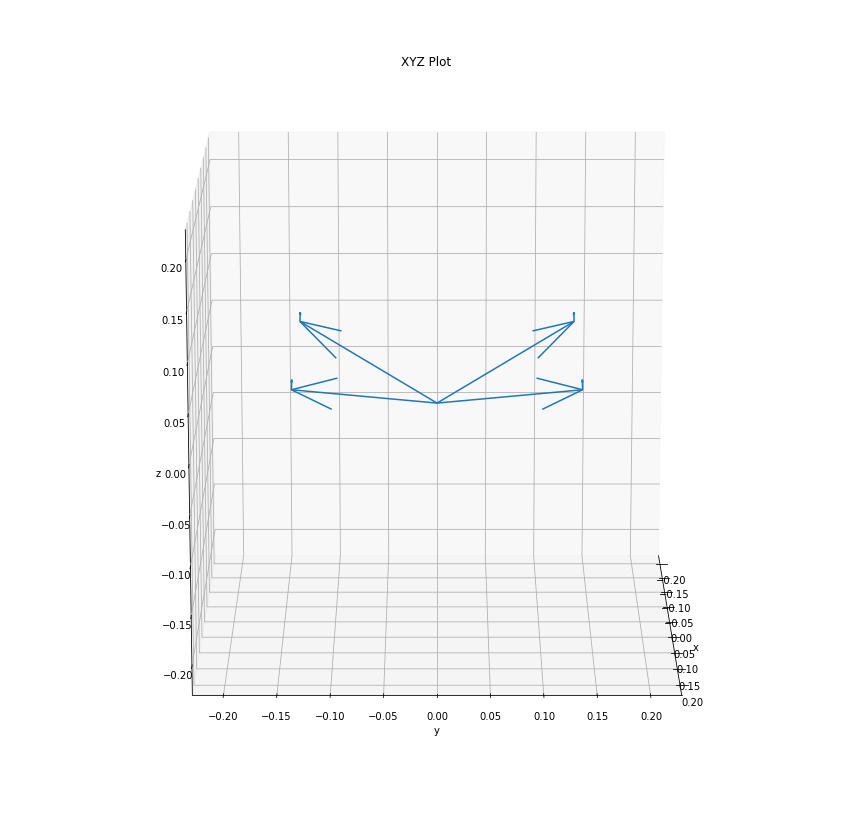

T_tots: [ 0.00000000e+00 -2.22044605e-16  2.77555756e-17] (Nm)


In [ ]:
def get_mot_rs(num_arms,arm_l,arm_h):
  al_xy = arm_l*np.cos(np.arcsin(arm_h/arm_l))
  r0 = np.asarray([al_xy,0,arm_h]).T
  psi_step = 2*np.pi/num_arms
  mot_rs = []
  for ai in range(num_arms):
    al_xy = arm_l*np.cos(np.arcsin(arm_h/arm_l))
    #psi = np.pi/2 + psi_step/2 + psi_step*ai
    psi = psi_step/2 + psi_step*ai
    ai_rot = get_R_from_rpy([0,0,psi])
    ai_r = np.matmul(ai_rot,r0)
    mot_rs.append(ai_r)
  return mot_rs

### mot_pitch is positive angle from z-axis in towards frame
def get_mot_fns(num_arms,mot_pitch):
  fn0 = np.asarray([0,0,1]).T
  psi_step = 2*np.pi/num_arms
  mot_fns = []
  for ai in range(num_arms):
    psi = np.pi/2 + psi_step/2 + psi_step*ai
    ai_rot = get_R_from_rpy([-mot_pitch,0,psi])
    fni = np.matmul(ai_rot,fn0)
    mot_fns.append(fni)
  return mot_fns

num_rotors = 4 ### count
arm_l = .2 ### (m)
arm_h = .05 ### (m)
mot_pitch = np.pi/60 ### (rad) should be about ~3degrees
mot_offs = get_mot_rs(num_rotors,arm_l,arm_h)
mot_fns = get_mot_fns(num_rotors,mot_pitch)

### check mot offsets and motor normals
import matplotlib.pyplot as plt
import numpy as np

elev,azim = 15,0

ax = plt.figure(figsize=(15,15)).add_subplot(projection='3d')
for mi,moff in enumerate(mot_offs):
  x,y,z = 0,0,0
  u,v,w = moff.tolist()
  ax.quiver(x, y, z, u, v, w, normalize=False)
  nx,ny,nz = mot_fns[mi].tolist()
  ax.quiver(u,v,w,nx,ny,nz, length=.01, normalize=True)

# Set each axis limits
minmax = [-arm_l*1.1,arm_l*1.1]
ax.set_xlim(minmax)
ax.set_ylim(minmax) 
ax.set_zlim(minmax) 

ax.set(xlabel='x', ylabel='y', zlabel='z',title='XYZ Plot')
ax.view_init(elev, azim)
plt.show()

def get_T_from_mot_Ns(mot_Fs,mot_offs,mot_fns):
  T_tots = np.asarray([0,0,0],dtype=np.float64).T
  for mi,motF in enumerate(mot_Fs):
    mi_rx,mi_ry,mi_rz = mot_offs[mi].tolist()
    mi_fnx,mi_fny,mi_fnz = mot_fns[mi].tolist()
    l_mi = np.asarray([mi_rx,mi_ry,mi_rz]).T
    Fi = motF*np.asarray([mi_fnx,mi_fny,mi_fnz])
    Ti = np.cross(l_mi,Fi)
    T_tots += Ti
  return T_tots

mot_Fs = [10 for mi in range(num_rotors)]
mot_T = get_T_from_mot_Ns(mot_Fs,mot_offs,mot_fns)
print("T_tots:",mot_T,"(Nm)")

In [ ]:
###############################################################################
###############################################################################
### UAV Dynamics
###############################################################################
###############################################################################

desired_pos = X_des = np.asarray([0,0,0,0]).T ### x,y,z,psi (yaw)
### X_des -> pos_controller -> roll_des,pitch_des -> attitude controller -> motor F's
Xd = np.asarray([0,0,0]).T
Xdd = np.asarray([0,0,0]).T
Kx,Ky,Kz = .001,.001,.001 ### drag coefficients (kg/s)
drag_mat = np.asarray([[-Kx,0,0],
                       [0,-Ky,0],
                       [0,0,-Kz]])
#r_uav2world = get_R_from_rpy([uav_roll,uav_pitch,uav_yaw])
#total_uav_mass*Xdd = reaction_F_total - total_uav_mass*a_g + np.matmul(drag_mat,Xd) + np.matmul(r_uav2world,F_thrust)
#F_thrust = np.matmul(np.linalg.inv(r_uav2world),(total_uav_mass*Xdd - reaction_F_total + total_uav_mass*a_g - np.matmul(drag_mat,Xd)))
### setting r_uav2world = identity for intital thrust estmation. Next step will determine rpy
F_thrust = total_uav_mass*Xdd - reaction_F_total - total_uav_mass*a_g + np.matmul(drag_mat,Xd)
print("F_Thrust from Dynamics:",F_thrust,"(N)")
### F_thrust = sum(mi_F) ### [Fx,Fy,Fz] (N,N,N)

#def get_orientation_from_F(F,yaw):
  ### find roll, pitch from rotating z-axis to meet F
  ### norm F
  #Fx,Fy,Fz = F.tolist()
  #F_mag = np.sqrt(Fx**2+Fy**2+Fz**2)
  #Fnx,Fny,Fnz = Fx/F_mag,Fy/F_mag,Fz/F_mag
  #zax = np.asarray([0,0,1]).T
  #xyplane_Fnhyp = np.sqrt(Fnx**2+Fny**2)
  #roll = np.arctan(xyplan_Fnhyp/Fnz) WRONG
  #if Fx >=0 and Fy >= 0: sign = 1
  #elif Fx >=0 and Fy <= 0: sign = -1
  #elif Fx <=0 and Fy <= 0: sign = -1
  #elif Fx <=0 and Fy >= 0: sign = -1
  #pitch = np.arctan(Fnx/Fnz) WRONG
  #return roll,pitch"

def get_orientation_from_F(F):
  ### simplified problem: already have appropriate yaw and zero roll
  roll,yaw = 0,0
  pitch = np.arctan(F[1]/F[2])
  return roll,pitch,yaw

uav_roll,uav_pitch,uav_yaw = get_orientation_from_F(F_thrust)
print("OmegaE roll, pitch, yaw:",uav_roll,uav_pitch,uav_yaw,"(rad)")
### OdE is angular momentum in WORLD frame. OD is roll,pitch,yaw in BODY frame. OE is roll,pitch,yaw in WORLD frame.
OE = np.asarray([uav_roll,uav_pitch,uav_yaw])
rolld,pitchd,yawd = 0,0,0
OdE = np.asarray([rolld,pitchd,yawd]).T
rolldd,pitchdd,yawdd = 0,0,0
OddE = np.asarray([rolldd,pitchdd,yawdd]).T
#OdB = np.matmul(r_W2B,OdE)
#O_r = ### difference of sum of even motors minus odd motors: O_r = w2+w4-w1-w3
### JB is inertia matrix of uav in BODY frame
#np.matmul(JB,OddB) = np.cross(OdB,np.matmul(JB,OB)) + reaction_T_total + mot_T
#mot_T = np.matmul(JB,OddB) - (np.cross(OdB,np.matmul(JB,OB)) + reaction_T_total)
JE = I_total
mot_T = np.matmul(JE,OddE) - (np.cross(OdE,np.matmul(JE,OdE)) + reaction_T_total)
print("mot_T:",mot_T,"(Nm)")

### T_total = sum(Ti), Ti = (ri X fni)*Fi -->  inv(ri X fni)*Ti = Fi
### inv(L)*T_total = F --> L = [r0Xfn0, r1Xfn1, ..., r5Xfn5]



F_Thrust from Dynamics: [  0.         179.03395408   7.44259834] (N)
OmegaE roll, pitch, yaw: 0 1.529249372540591 0 (rad)
mot_T: [-12.97445155   0.           0.        ] (Nm)


In [ ]:
### U0 = Force total
U0row = np.ones((4,))
#### quadcopter
### U1 = torque about x axis
rot_l = np.cos(np.pi/4)*arm_l
U1row = rot_l*np.asarray([1,-1,-1,1])
### U2 = torque about y axis
U2row = rot_l*np.asarray([1,1,-1,-1])
### U3 = torque about z axis
Tzcoeff = .5
U3row = rot_l*np.asarray([1,-1,1,-1])*Tzcoeff
Umat = np.vstack([U0row,U1row,U2row,U3row])
print("Umat:",Umat)
Uinv = np.linalg.inv(Umat)
print("Uinv:",Uinv)
F_thrust_mag = np.asarray([np.sqrt(F_thrust[0]**2+F_thrust[1]**2+F_thrust[2]**2)])
FT = np.concatenate([F_thrust_mag,mot_T])
print("FT:",FT)
mot_Fs = np.matmul(Uinv,FT)
print("mot_Fs:",mot_Fs,"(N)")

Umat: [[ 1.          1.          1.          1.        ]
 [ 0.14142136 -0.14142136 -0.14142136  0.14142136]
 [ 0.14142136  0.14142136 -0.14142136 -0.14142136]
 [ 0.07071068 -0.07071068  0.07071068 -0.07071068]]
Uinv: [[ 0.25        1.76776695  1.76776695  3.53553391]
 [ 0.25       -1.76776695  1.76776695 -3.53553391]
 [ 0.25       -1.76776695 -1.76776695  3.53553391]
 [ 0.25        1.76776695 -1.76776695 -3.53553391]]
FT: [179.18858497 -12.97445155   0.           0.        ]
mot_Fs: [21.86133956 67.73295292 67.73295292 21.86133956] (N)


In [ ]:
#### estimate drone power needed
test_uav_mass = 5 ### (kg)
test_payload = 10 ### (kg)
F_test = -test_payload*a_g
F_test_quad_mot = F_test/4
print("F_test_quad_mot:",F_test_quad_mot,"(N)")

F_test_quad_mot: [-0.    -0.    24.525] (N)


In [ ]:
###############################################################################
###############################################################################
### find max pitch
###############################################################################
###############################################################################


###############################################################################
### Flow Characteristics
###############################################################################
density_water = 997 ### (kg/m^3)
gpm = 4 ### (gal/min)
P = 4000 ### (PSI)
Pambient = 14.7 ### (PSI)
Qmass = gpm*(1/60)*(3.785/1) ### gal/min * (min/s) * (kg/gal) = kg/s
d = .001 ### (m)
QVol = gpm * (1/60) * (1/264.172) ### (gal/min) * (min/s) * (m^3/gal) = (m^3/s) ### should be in ballpark of .0002
A = np.pi*((d/2)**2) ### (m^2) could be as low as 10^-6 (even slightly lower)
v_flow = QVol / A ### (m/s) should be in ballpark of 100 m/s
v_P = np.sqrt(P/(.5*density_water)) ### (m/s)
v = max(v_flow,v_P) ### (m/s)
### Bernoulli's
v_Pam = np.sqrt(2*(P-Pambient)/density_water+v**2) ### (m/s)
F_jet_thrust = Qmass*v ### (N)
F_p_drop = A*(P-Pambient) ### (N)
F_v_drop = Qmass*(v_Pam-v) ### (N)
### Reaction Force from Water Jet
### paper found 20-35% more reaction force than expected from following equation https://www.wjta.org/images/wjta/Proceedings/Papers/2013/C1%20-%20DW%20Impact.pdf
F_wj = .052*np.sqrt(P)*gpm ### should basically be Qmass*v...
F_wj_adj = 1.3*F_wj
#v2 = .99*v ### Pressure after bend, assuming 1% loss
v2 = v ### (m/s)
P2 = P + density_water*.5*(v**2-v2**2) ### (PSI)
### torque levers
#rx_nozzle_mount = 0 ### (m) x distance from nozzle tip to mounting
#rz_nozzle_mount = 0 ### (m) y distance from nozzle tip to mounting
#rx_bend_mount = 0 ### (m) x distance from bend center to mounting
#rz_bend_mount = 0 ### (m) y distance from bend center to mounting
rx_nozzle_mount = 1.15 ### (m) x distance from nozzle tip to mounting
rz_nozzle_mount = .02 ### (m) y distance from nozzle tip to mounting
rx_bend_mount = .2 ### (m) x distance from bend center to mounting
rz_bend_mount = .1 ### (m) y distance from bend center to mounting
wand_l = 1.35
mass_wand = 2 ### (kg)
### Pipe Bend
num_steps = 20
theta_start = 0
theta_stop = np.pi
theta_step = (theta_stop-theta_start)/num_steps
thetas,F_mags,max_Fs = [],[],[]
rFx,rFz = [],[]
for i in range(num_steps+1):
  theta = theta_start + i*theta_step
  Fbendz = -(-P*A -P2*A*np.cos(theta)-density_water*QVol*(v+v2*np.cos(theta))) ### (N)
  Fbendx = P2*A*np.sin(theta) + density_water*v2*QVol*np.sin(theta) ### (N)
  Fx_total = np.sin(theta)*(F_jet_thrust + F_p_drop + F_v_drop + F_wj_adj) + Fbendx ### (N)
  Fz_total = np.cos(theta)*(F_jet_thrust + F_p_drop + F_v_drop + F_wj_adj) + Fbendz ### (N)
  rFx.append(-Fx_total)
  rFz.append(-Fz_total)
  T_nozzle = rz_nozzle_mount*(F_jet_thrust + F_p_drop + F_v_drop + F_wj_adj) ### (Nm)
  T_bend = rz_bend_mount*(Fbendx)+rx_bend_mount*(Fbendz) ### (Nm)
  wand_com_rx = wand_l/2*np.cos(theta)
  T_wand_g = -mass_wand*wand_com_rx*9.81 ### (Nm)
  T_total = T_nozzle + T_bend + T_wand_g ### (Nm)
  ### Reaction F, T totals
  reaction_F_total = np.asarray([0,-Fx_total,-Fz_total]).T
  reaction_T_total = np.asarray([T_total,0,0]).T

  #print("reaction_F_total:",reaction_F_total,"(N)")
  #print("reaction_T_total:",reaction_T_total,"(Nm)")

  F_thrust = total_uav_mass*Xdd - reaction_F_total - total_uav_mass*a_g + np.matmul(drag_mat,Xd)

  #### quadcopter estimations:
  ### U0 = Force total
  U0row = np.ones((4,))
  #### quadcopter
  ### U1 = torque about x axis
  rot_l = np.cos(np.pi/4)*arm_l
  U1row = rot_l*np.asarray([1,-1,-1,1])
  ### U2 = torque about y axis
  U2row = rot_l*np.asarray([1,1,-1,-1])
  ### U3 = torque about z axis
  Tzcoeff = .5
  U3row = rot_l*np.asarray([1,-1,1,-1])*Tzcoeff
  Umat = np.vstack([U0row,U1row,U2row,U3row])
  Uinv = np.linalg.inv(Umat)
  F_thrust_mag = np.asarray([np.sqrt(F_thrust[0]**2+F_thrust[1]**2+F_thrust[2]**2)])
  FT = np.concatenate([F_thrust_mag,mot_T])
  #print("FT:",FT)
  mot_Fs = np.matmul(Uinv,FT)
  #print("hose_angle:",theta*180/np.pi,"(deg)")
  thetas.append(theta)
  #print("mot_Fs:",mot_Fs,"(N)")
  #print("F_bend:",np.asarray([0,Fbendx,Fbendz]),"(N)")
  #print("reaction_F_total:",reaction_F_total,"(N)")
  #print("F mag:",sum(mot_Fs),"(N)")
  F_mags.append(sum(mot_Fs))
  #print("max F:",max(mot_Fs),"(N)")
  max_Fs.append(max(mot_Fs))

theta not found in range
theta not found in range
theta not found in range
theta not found in range


Text(0.5, 1.0, 'Forces VS Hose Angle VS Num Rotors, test_motor_thrust=10(N)')

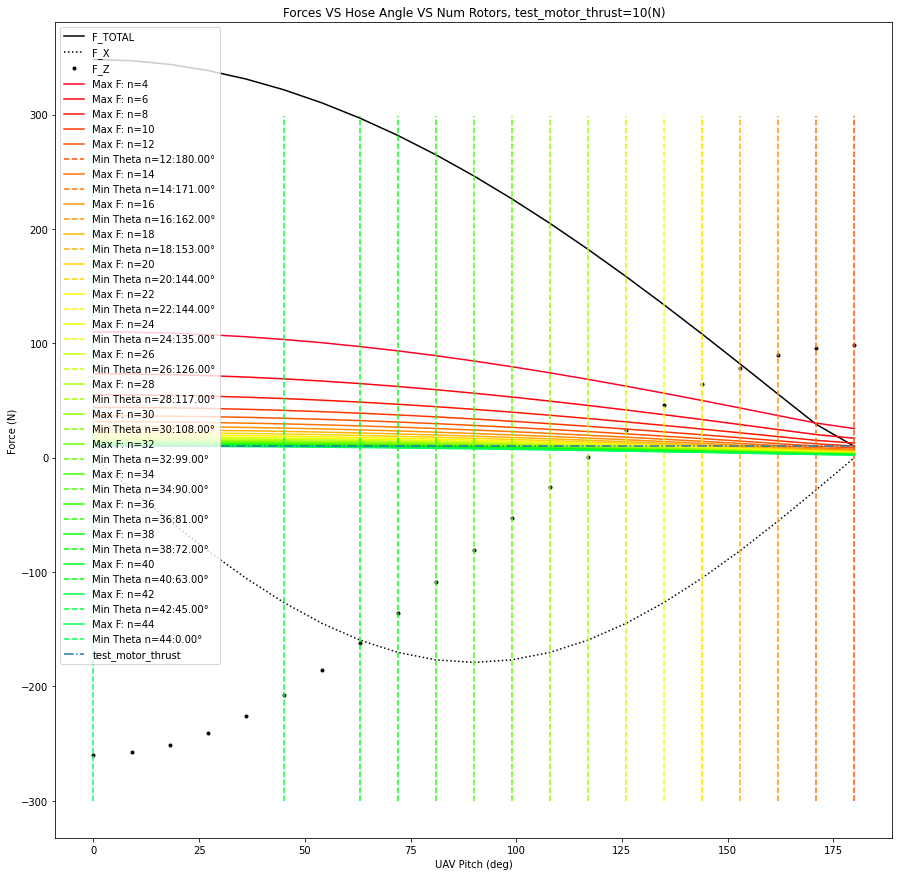

In [ ]:
from matplotlib import cm

def get_min_theta(max_Fs,thetas,thresh_F):
  for i,MF in enumerate(max_Fs):
    if MF < thresh_F:
      test_theta = thetas[i]
      #test_theta = theta_from_F(MF)
      return test_theta
  print("theta not found in range")
  return "None"

test_max_F = 10
max_num_rotors = 44

all_maxFs = []
all_minThetas = []
for i in range(max_num_rotors):
  rot_num = i+1
  ### only worry about even numbers of rotors 4 and up
  if rot_num%2 == 0 and rot_num>= 4:
    curr_maxFs = [i*4/rot_num for i in max_Fs]
    all_maxFs.append(curr_maxFs)
    curr_minTheta = get_min_theta(curr_maxFs,thetas,test_max_F)
    all_minThetas.append(curr_minTheta)

f = plt.figure(figsize=(15,15))

#cmap = cm.get_cmap('YlOrBr', max_num_rotors)
cmap = plt.cm.gist_rainbow(np.linspace(0,1,max_num_rotors))

legend_labs = []
### convert rads to degs
deg_thetas = [t*180/np.pi for t in thetas]
### plot TOTAL F mag and components
plt.plot(deg_thetas,F_mags,"k-")
plt.plot(deg_thetas,rFx,"k:")
plt.plot(deg_thetas,rFz,"k.")
legend_labs += ["F_TOTAL", "F_X", "F_Z"]

### plot maxF(num_rotors)
for i,mFs in enumerate(all_maxFs):
  plt.plot(deg_thetas,mFs,color=cmap[i])
  curr_mF_lab = "Max F: n="+str(4+2*i)
  legend_labs.append(curr_mF_lab)
  ### plot min theta
  if all_minThetas[i] != "None":
    plt.plot(np.full((600,),all_minThetas[i]*180/np.pi),range(-300,300),color=cmap[i],linestyle="--")
    curr_theta_lab = "Min Theta n="+str(4+2*i)+":"+"{0:.2f}".format(all_minThetas[i]*180/np.pi)+"°"
    legend_labs.append(curr_theta_lab)

### plot test_motor_F
plt.plot(deg_thetas,np.full((len(deg_thetas),),test_max_F),linestyle="dashdot")
legend_labs.append("test_motor_thrust")

plt.legend(legend_labs)
plt.xlabel("UAV Pitch (deg)")
plt.ylabel("Force (N)")
plt.title("Forces VS Hose Angle VS Num Rotors, test_motor_thrust="+str(test_max_F)+"(N)")

theta not found in range
theta not found in range


Text(0.5, 1.0, 'Forces VS Hose Angle VS Num Rotors, test_motor_thrust=16(N)')

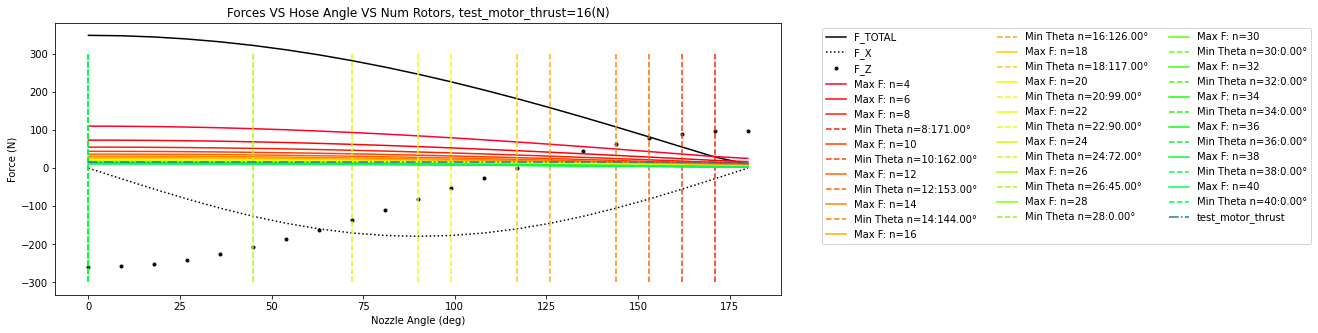

In [ ]:
test_max_F = 16
max_num_rotors = 40

all_maxFs = []
all_minThetas = []
for i in range(max_num_rotors):
  rot_num = i+1
  ### only worry about even numbers of rotors 4 and up
  if rot_num%2 == 0 and rot_num>= 4:
    curr_maxFs = [i*4/rot_num for i in max_Fs]
    all_maxFs.append(curr_maxFs)
    curr_minTheta = get_min_theta(curr_maxFs,thetas,test_max_F)
    all_minThetas.append(curr_minTheta)

f = plt.figure(figsize=(13,5))

#cmap = cm.get_cmap('YlOrBr', max_num_rotors)
cmap = plt.cm.gist_rainbow(np.linspace(0,1,max_num_rotors))

legend_labs = []
### plot TOTAL F mag and components
plt.plot(deg_thetas,F_mags,"k-")
plt.plot(deg_thetas,rFx,"k:")
plt.plot(deg_thetas,rFz,"k.")
legend_labs += ["F_TOTAL", "F_X", "F_Z"]

### plot maxF(num_rotors)
for i,mFs in enumerate(all_maxFs):
  plt.plot(deg_thetas,mFs,color=cmap[i])
  curr_mF_lab = "Max F: n="+str(4+2*i)
  legend_labs.append(curr_mF_lab)
  ### plot min theta
  if all_minThetas[i] != "None":
    plt.plot(np.full((600,),all_minThetas[i]*180/np.pi),range(-300,300),color=cmap[i],linestyle="--")
    curr_theta_lab = "Min Theta n="+str(4+2*i)+":"+"{0:.2f}".format(all_minThetas[i]*180/np.pi)+"°"
    legend_labs.append(curr_theta_lab)

### plot test_motor_F
plt.plot(deg_thetas,np.full((len(deg_thetas),),test_max_F),linestyle="dashdot")
legend_labs.append("test_motor_thrust")

plt.legend(legend_labs, bbox_to_anchor=(1.05, 1.0), loc='upper left',ncol=3)
plt.xlabel("Nozzle Angle (deg)")
plt.ylabel("Force (N)")
plt.title("Forces VS Hose Angle VS Num Rotors, test_motor_thrust="+str(test_max_F)+"(N)")

Text(0.5, 1.0, 'Forces VS Hose Angle VS Num Rotors, test_motor_thrust=50(N)')

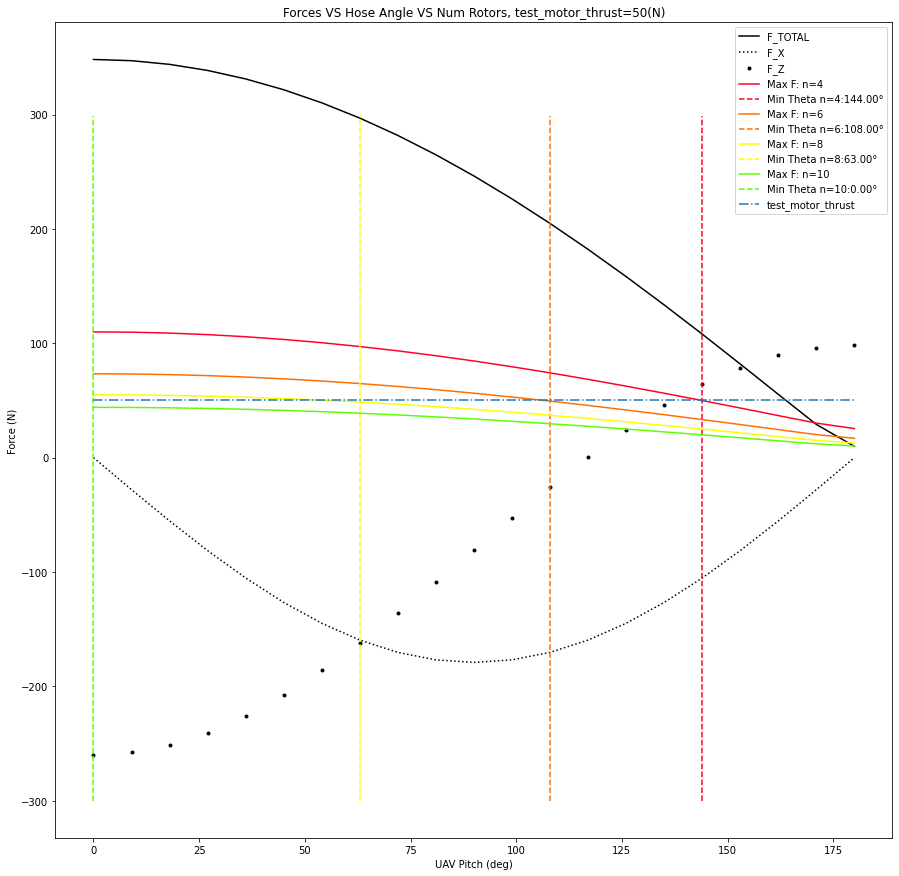

In [ ]:
test_max_F = 50
max_num_rotors = 10

all_maxFs = []
all_minThetas = []
for i in range(max_num_rotors):
  rot_num = i+1
  ### only worry about even numbers of rotors 4 and up
  if rot_num%2 == 0 and rot_num>= 4:
    curr_maxFs = [i*4/rot_num for i in max_Fs]
    all_maxFs.append(curr_maxFs)
    curr_minTheta = get_min_theta(curr_maxFs,thetas,test_max_F)
    all_minThetas.append(curr_minTheta)

f = plt.figure(figsize=(15,15))

#cmap = cm.get_cmap('YlOrBr', max_num_rotors)
cmap = plt.cm.gist_rainbow(np.linspace(0,1,max_num_rotors))

legend_labs = []
### plot TOTAL F mag and components
plt.plot(deg_thetas,F_mags,"k-")
plt.plot(deg_thetas,rFx,"k:")
plt.plot(deg_thetas,rFz,"k.")
legend_labs += ["F_TOTAL", "F_X", "F_Z"]

### plot maxF(num_rotors)
for i,mFs in enumerate(all_maxFs):
  plt.plot(deg_thetas,mFs,color=cmap[i])
  curr_mF_lab = "Max F: n="+str(4+2*i)
  legend_labs.append(curr_mF_lab)
  ### plot min theta
  if all_minThetas[i] != "None":
    plt.plot(np.full((600,),all_minThetas[i]*180/np.pi),range(-300,300),color=cmap[i],linestyle="--")
    curr_theta_lab = "Min Theta n="+str(4+2*i)+":"+"{0:.2f}".format(all_minThetas[i]*180/np.pi)+"°"
    legend_labs.append(curr_theta_lab)

### plot test_motor_F
plt.plot(deg_thetas,np.full((len(deg_thetas),),test_max_F),linestyle="dashdot")
legend_labs.append("test_motor_thrust")

plt.legend(legend_labs)
plt.xlabel("UAV Pitch (deg)")
plt.ylabel("Force (N)")
plt.title("Forces VS Hose Angle VS Num Rotors, test_motor_thrust="+str(test_max_F)+"(N)")

In [ ]:
####################
### INVERSE METHODS
###################
def get_F_to_T_mapping(mot_offs,mot_fns):
  L = []
  for mi,motoff in enumerate(mot_offs):
    r_mi = motoff
    fn_mi = mot_fns[mi]
    L_mi = np.cross(r_mi,fn_mi)
    print("L_mi:",L_mi)
    L.append(L_mi)
  L = np.asarray(L)
  return L
L = get_F_to_T_mapping(mot_offs,mot_fns).T
print("L:",L,"(m)")
print("L shape:",L.shape,"(dims)")
print("mot_T:",mot_T,"(Nm)")
print("mot_T shape:",mot_T.shape)
usePadding = True
if usePadding:
  Tpad = np.zeros((num_rotors-3,))
  print("Tpad shape:",Tpad)
#print("pad3x1:",pad3x1.shape)
#mot_T_pad = np.vstack([mot_T,pad3x1.T])
  mot_T_pad = np.concatenate((mot_T, Tpad), axis=None)
  print("mot_T_pad:",mot_T_pad,"(Nm)")
  Lpad = np.zeros((num_rotors-3,num_rotors))
  print("Lpad shape:",Lpad.shape)
  L_sq = np.vstack([L,Lpad])
  print("L_sq:",L_sq,"(1/m)")
  L_sq_inv = np.linalg.inv(L_sq)
  Fs = np.matmul(L_sq_inv,mot_T_pad.T)
else:
  L_inv = np.linalg.inv(L)
  print("L_inv:",L_inv,"(1/m)")
  Fs = np.matmul(L_inv,mot_T.T)
mi_Fs = Fs
print("mi_Fs:",mi_Fs,"(N)")

L_mi: [ 1.38593336e-01 -1.38593336e-01  4.33680869e-18]
L_mi: [ 1.38593336e-01  1.38593336e-01 -2.60208521e-18]
L_mi: [-1.38593336e-01  1.38593336e-01  2.60208521e-18]
L_mi: [-1.38593336e-01 -1.38593336e-01 -8.67361738e-19]
L: [[ 1.38593336e-01  1.38593336e-01 -1.38593336e-01 -1.38593336e-01]
 [-1.38593336e-01  1.38593336e-01  1.38593336e-01 -1.38593336e-01]
 [ 4.33680869e-18 -2.60208521e-18  2.60208521e-18 -8.67361738e-19]] (m)
L shape: (3, 4) (dims)
mot_T: [-12.97445155   0.           0.        ] (Nm)
mot_T shape: (3,)
Tpad shape: [0.]
mot_T_pad: [-12.97445155   0.           0.           0.        ] (Nm)
Lpad shape: (1, 4)
L_sq: [[ 1.38593336e-01  1.38593336e-01 -1.38593336e-01 -1.38593336e-01]
 [-1.38593336e-01  1.38593336e-01  1.38593336e-01 -1.38593336e-01]
 [ 4.33680869e-18 -2.60208521e-18  2.60208521e-18 -8.67361738e-19]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]] (1/m)


LinAlgError: ignored